# DIMENSIONALITY REDUCTION

## PCA

In [1]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
iris = load_iris()
X = iris['data']
y = iris['target']
pca = PCA(n_components=2) ## or set n_components to a value between 0 and 1 to signify how much explained variance you want
X2D = pca.fit_transform(X) ## This is useful for transforming the IVs into n-dimensions based on how much data you want to preserve

In [2]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [3]:
## ANOTHER APPROACH
import numpy as np
pca2 = PCA()
pca2.fit(X)
cumsum = np.cumsum(pca2.explained_variance_ratio_)
d = np.argmax(cumsum>= 0.95) + 1

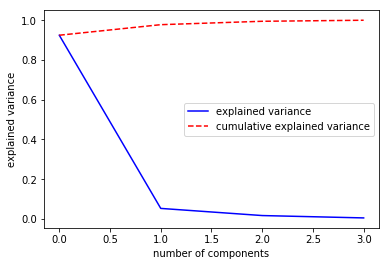

In [4]:
## Plotting a graph that clearly shows how each individual components contribute to explaining the varince alongside its cumulative variance
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(pca2.explained_variance_ratio_, 'b-', label = "explained variance")
plt.plot(np.cumsum(pca2.explained_variance_ratio_), 'r--', label = "cumulative explained variance")
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.legend(); 

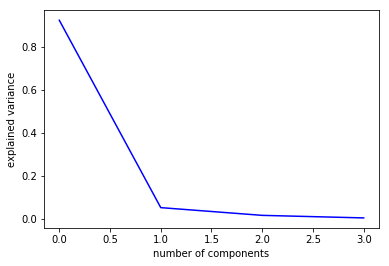

In [5]:
## Plotting the graphs above individually
plt.plot(pca2.explained_variance_ratio_, 'b-', label = "explained variance")
plt.xlabel('number of components')
plt.ylabel('explained variance');

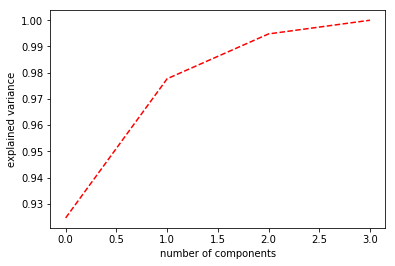

In [6]:
plt.plot(np.cumsum(pca2.explained_variance_ratio_), 'r--', label = "explained variance")
plt.xlabel('number of components')
plt.ylabel('explained variance');

In [7]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version = 1)
X_mnist = mnist['data']

In [8]:
pca3 = PCA()
pca3.fit(X_mnist);

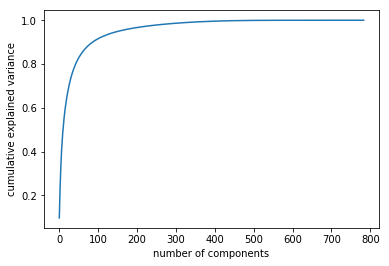

In [9]:
plt.plot(np.cumsum(pca3.explained_variance_ratio_))
plt.xlabel("number of components")
plt.ylabel("cumulative explained variance");

### PCA FOR COMPRESSION

In [10]:
pca4 = PCA(n_components = 154)
X_reduced = pca4.fit_transform(X_mnist)
X_recovered = pca4.inverse_transform(X_reduced)

### RANDOMIZED PCA

In [11]:
rnd_pca = PCA(n_components = 154, svd_solver = "randomized")
X_randomized = rnd_pca.fit_transform(X_mnist)

### INCREMENTAL PCA

In [12]:
from sklearn.decomposition import IncrementalPCA
n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_mnist, n_batches):
    inc_pca.partial_fit(X_batch)
X_reduced = inc_pca.transform(X_mnist)

### KERNEL PCA

In [13]:
from sklearn.decomposition import KernelPCA
rbf_pca = KernelPCA(n_components = 2, kernel = "rbf", gamma = 0.04)
X_reduced = rbf_pca.fit_transform(X)

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
clf = Pipeline([("kpca", KernelPCA(n_components = 2)), ("log_reg", LogisticRegression())])
param_grid = [{"kpca__gamma": np.linspace(0.03,0.05,10), "kpca__kernel": ["rbf", "sigmoid"]}]

In [15]:
grid_search = GridSearchCV(clf, param_grid, cv = 3)
grid_search.fit(X, y)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linea

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linea

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('kpca', KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
     fit_inverse_transform=False, gamma=None, kernel='linear',
     kernel_params=None, max_iter=None, n_components=2, n_jobs=None,
     random_state=None, remove_zero_eig=False, tol=0)), ('log_reg', LogisticRe...penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'kpca__gamma': array([0.03   , 0.03222, 0.03444, 0.03667, 0.03889, 0.04111, 0.04333,
       0.04556, 0.04778, 0.05   ]), 'kpca__kernel': ['rbf', 'sigmoid']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [16]:
grid_search.best_estimator_

Pipeline(memory=None,
     steps=[('kpca', KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
     fit_inverse_transform=False, gamma=0.05, kernel='rbf',
     kernel_params=None, max_iter=None, n_components=2, n_jobs=None,
     random_state=None, remove_zero_eig=False, tol=0)), ('log_reg', LogisticRegre...penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [17]:
rbf_pca2 = KernelPCA(n_components = 2, kernel = "rbf", gamma = 0.04, fit_inverse_transform = True)
X_red2 = rbf_pca2.fit_transform(X)
X_preimage = rbf_pca2.inverse_transform(X_red2)

In [18]:
from sklearn.metrics import mean_squared_error
mean_squared_error(X, X_preimage)

0.17308565652726748

### LLE

In [19]:
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_components=2, n_neighbors = 10)
X_reduced = lle.fit_transform(X)